# <font color= "blue"><b>Optional Lab - Neurons and Layers<b></font>
In this lab we will explore the inner workings of neurons/units and layers. In particular, the lab will draw parallels to the models you have mastered in Course 1, the regression/linear model and the logistic model. The lab will introduce Tensorflow and demonstrate how these models are implemented in that framework.


## Packages
**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

import sys
sys.path.append("Materials_By_Deeplearning/")
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./Materials_By_Deeplearning/deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

print("Run Sucessfully")

Run Sucessfully


### <font color="red"> Regression/Linear Model </font> 
The function implemented by a neuron with no activation is the same as in Course 1, linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$



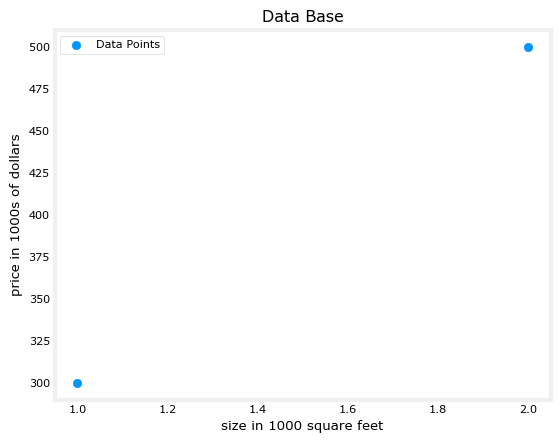

In [2]:
x_train = np.array([[1.0],[2.0]])      #(size in 1000 square feet)
y_train = np.array([[300.0], [500.0]])       #(price in 1000s of dollars)

plt.scatter(x_train, y_train, marker='o', label="Data Points")
plt.title('Data Base')
plt.xlabel('size in 1000 square feet')
plt.ylabel('price in 1000s of dollars')
plt.legend()
plt.plot()
plt.show()

We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [3]:
linear_layer = tf.keras.layers.Dense( units=1, activation='linear') 

Let's examine the weights.

In [4]:
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in `X_train`. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.


**Below given code explanation**

`X_train`: It seems that X_train is a data array or tensor used for training a machine learning model.

`X_train[0]`: This extracts the first element from the X_train array.

`.reshape(1, 1)`: The reshape method is used to change the shape of the array. In this case, it is reshaping the first element of X_train into a 1x1 matrix (2D array) because the linear_layer expects a 2D input. This step is likely required if the original shape of X_train[0] was a 1D array or scalar.

`linear_layer`: This is the previously defined linear layer using TensorFlow's Keras library, as mentioned in the previous code snippet.

`linear_layer(X_train[0].reshape(1, 1))`: This line applies the linear_layer to the reshaped input X_train[0].reshape(1, 1). It passes this 1x1 input to the layer, and the layer computes its output.

In summary, the code computes the output of the `linear_layer` for the first element of X_train after reshaping it into a 1x1 matrix and stores the result in the variable a1. This is typically part of the forward pass in a neural network, where the input data flows through the layers to produce predictions or activations.

In [5]:
print(x_train[0].reshape(1,1))
a1 = linear_layer(x_train[0].reshape(1,1))
print (a1)

[[1.]]
tf.Tensor([[-0.06]], shape=(1, 1), dtype=float32)


In [6]:
w , b = linear_layer.get_weights()
print(f"w = {w}, b= {b}")

# in this every time you run this cell by restarting kernal it will give diffrent value of w and b because it initilize
# w and b with random values 

w = [[-0.06]], b= [0.]


A linear regression model (1) with a single input feature will have a single weight and bias. This matches the dimensions of our `linear_layer` above.   

The weights are initialized to random values so let's set them to some known values.

In [7]:
# Setting up the initial parameters ie w and b which We generally set it by gradient descent in traditional ML 
set_w = np.array([[200]])
set_b = np.array([100])

#setting the weights (parameters)
linear_layer.set_weights([ set_w,set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [8]:
#lets pridect the frist test case with neural network
a1 = linear_layer(x_train[0].reshape(1,1))
print(a1)

#lets pridect the frist test case with normal dot operation 
aline = np.dot(set_w,x_train[0].reshape(1,1)) + set_b
print(aline)

# hence we can notice that both value are same and now  

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


They produce the same values!
Now, we can use our linear layer to make predictions on our training data.

In [9]:

predict_by_tf = linear_layer(x_train)
predict_by_manual = np.dot(x_train,set_w) + set_b

print("predict_by_tf\n",predict_by_tf)
print("\n predict_by_manual \n",predict_by_manual)

# hence heare we call see that values are same because ge gave same input of w and b to the TF and Linear Regression 

predict_by_tf
 tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)

 predict_by_manual 
 [[300.]
 [500.]]


<function matplotlib.pyplot.show(close=None, block=None)>

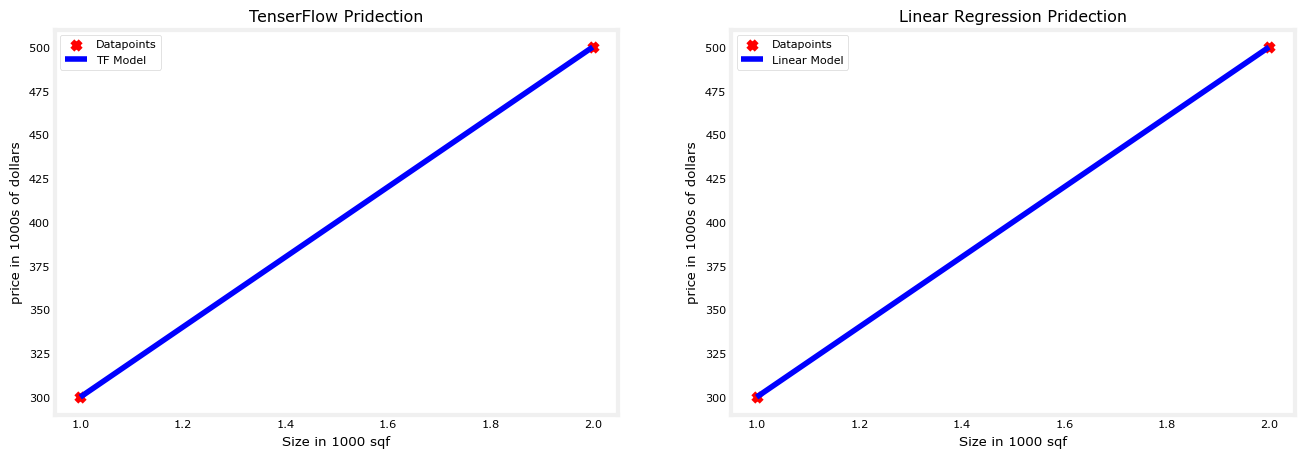

In [10]:
# Now lets plot the graph

_,ax = plt.subplots(1,2,  figsize=(16,5))
ax[0].scatter(x_train,y_train, marker='x',label="Datapoints", c="red")
ax[0].plot(x_train,predict_by_tf,c="blue",label="TF Model")
ax[0].legend()
ax[0].set_ylabel("price in 1000s of dollars")
ax[0].set_xlabel("Size in 1000 sqf")
ax[0].set_title("TenserFlow Pridection")

ax[1].scatter(x_train,y_train, marker='x',label="Datapoints", c="red")
ax[1].plot(x_train,predict_by_manual,c="blue",label="Linear Model")
ax[1].set_ylabel("price in 1000s of dollars")
ax[1].set_xlabel("Size in 1000 sqf")
ax[1].legend()
ax[1].set_title("Linear Regression Pridection")

plt.show


## <font color="red"> Neuron with Sigmoid activation </font>
 The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 

Let's set $w$ and $b$ to some known values and check the model.


In [11]:
x_train = np.array([0,1,2,3,4,5])
y_train = np.array([0,0,0,1,1,1])

print("x_train",x_train, ", y_train", y_train )
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
print("x_train",x_train, ",\ny_train", y_train )

x_train [0 1 2 3 4 5] , y_train [0 0 0 1 1 1]
x_train [[0]
 [1]
 [2]
 [3]
 [4]
 [5]] ,
y_train [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [12]:
pos = y_train == 1
neg = y_train == 0

print("x_train[pos] = ",x_train[pos])
print("x_train[neg] = ",x_train[neg])

x_train[pos] =  [3 4 5]
x_train[neg] =  [0 1 2]


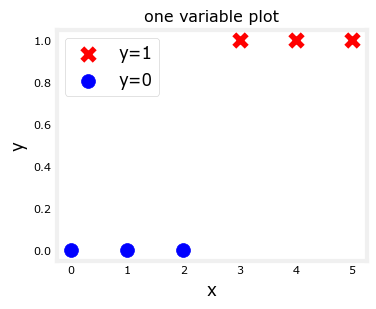

In [14]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", c="blue")

ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

### Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.   
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The [Sequential](https://keras.io/guides/sequential_model/) model is a convenient means of constructing these models.

In [15]:
model = Sequential(
    [
        tf.keras.layers.Dense(units=1, input_dim = 1,  activation = "sigmoid", name="L1")
    ]
)

`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
logistic_layer = model.get_layer('L1')
print(logistic_layer.get_weights())
# heare we will get the random value of w and b respectively

[array([[1.4]], dtype=float32), array([0.], dtype=float32)]


In [30]:
# setting the parameters of the tf model
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [31]:
# making the sigmoid function 
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [35]:
# Now let's compare the tensor flow and the traditional logistic regression 
TF_Pri = model.predict(x_train[0].reshape(-1,1))
print("Tenser Flow Pridection : ",TF_Pri)

x = x_train[0]
Log_Reg = sigmoid( np.dot(x,set_w)+set_b)
print("Pridection by logistic Regression : ",TF_Pri)

# hence we can notice that both value are same 

1/1 [==============================] - 0s 23ms/step
Tenser Flow Pridection :  [[0.01]]
Pridection by logistic Regression :  [[0.01]]
